In [ ]:
# connect to my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create shortcut do datasets folder
!ln -s "/content/drive/MyDrive/Bangkit 2023/Capstone Project/ML" "/content/ML"

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import sklearn.metrics
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
# make a function to split the data to train and validation
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
# save the directories into variables

DRY_SOURCE_DIR = "/content/ML/Datasets/skin_type/Dry/"
NORMAL_SOURCE_DIR = "/content/ML/Datasets/skin_type/Normal/"
OILY_SOURCE_DIR = "/content/ML/Datasets/skin_type/Oily/"
SENSITIVE_SOURCE_DIR = "/content/ML/Datasets/skin_type/Sensitive/"

TRAINING_DIR = "/content/ML/Datasets/skin_type/Train/"
VALIDATION_DIR = "/content/ML/Datasets/skin_type/Test/"

TRAINING_DRY_DIR = os.path.join(TRAINING_DIR, "Dry/")
VALIDATION_DRY_DIR = os.path.join(VALIDATION_DIR, "Dry/")

TRAINING_NORMAL_DIR = os.path.join(TRAINING_DIR, "Normal/")
VALIDATION_NORMAL_DIR = os.path.join(VALIDATION_DIR, "Normal/")

TRAINING_OILY_DIR = os.path.join(TRAINING_DIR, "Oily/")
VALIDATION_OILY_DIR = os.path.join(VALIDATION_DIR, "Oily/")

TRAINING_SENSITIVE_DIR = os.path.join(TRAINING_DIR, "Sensitive/")
VALIDATION_SENSITIVE_DIR = os.path.join(VALIDATION_DIR, "Sensitive/")

In [ ]:
# os.makedirs(TRAINING_DIR)
# os.makedirs(VALIDATION_DIR)
# os.makedirs(TRAINING_DRY_DIR)
# os.makedirs(VALIDATION_DRY_DIR)
# os.makedirs(TRAINING_NORMAL_DIR)
# os.makedirs(VALIDATION_NORMAL_DIR)
# os.makedirs(TRAINING_OILY_DIR)
# os.makedirs(VALIDATION_OILY_DIR)
# os.makedirs(TRAINING_SENSITIVE_DIR)
# os.makedirs(VALIDATION_SENSITIVE_DIR)

In [ ]:
# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(DRY_SOURCE_DIR))} images of dry skin.")
print(f"There are {len(os.listdir(NORMAL_SOURCE_DIR))} images of normal skin.")
print(f"There are {len(os.listdir(OILY_SOURCE_DIR))} images of oily skin.")
print(f"There are {len(os.listdir(SENSITIVE_SOURCE_DIR))} images of sensitive skin.")

There are 120 images of dry skin.
There are 118 images of normal skin.
There are 122 images of oily skin.
There are 100 images of sensitive skin.


In [ ]:
# split_size = .9

# split_data(DRY_SOURCE_DIR, TRAINING_DRY_DIR, VALIDATION_DRY_DIR, split_size)
# split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, VALIDATION_NORMAL_DIR, split_size)
# split_data(OILY_SOURCE_DIR, TRAINING_OILY_DIR, VALIDATION_OILY_DIR, split_size)
# split_data(SENSITIVE_SOURCE_DIR, TRAINING_SENSITIVE_DIR, VALIDATION_SENSITIVE_DIR, split_size)

In [ ]:
print(f"There are {len(os.listdir(TRAINING_DRY_DIR))} images of dry for training")
print(f"There are {len(os.listdir(TRAINING_NORMAL_DIR))} images of normal for training")
print(f"There are {len(os.listdir(TRAINING_OILY_DIR))} images of oily for training")
print(f"There are {len(os.listdir(TRAINING_SENSITIVE_DIR))} images of sensitive for training")

print(f"There are {len(os.listdir(VALIDATION_DRY_DIR))} images of dry for validation")
print(f"There are {len(os.listdir(VALIDATION_NORMAL_DIR))} images of normal for validation")
print(f"There are {len(os.listdir(VALIDATION_OILY_DIR))} images of oily for validation")
print(f"There are {len(os.listdir(VALIDATION_SENSITIVE_DIR))} images of sensitive for validation")

There are 108 images of dry for training
There are 106 images of normal for training
There are 109 images of oily for training
There are 90 images of sensitive for training
There are 12 images of dry for validation
There are 12 images of normal for validation
There are 13 images of oily for validation
There are 10 images of sensitive for validation


In [ ]:
def create_pre_trained_model():
  pre_trained_model = tf.keras.applications.MobileNetV3Large(input_shape=(224, 224, 3),
                                                        include_top=False,
                                                        weights='imagenet')

  # Make all the layers in the pre-trained model non-trainable
  from tensorflow.keras import layers
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model()

# Print the model summary
pre_trained_model.summary()

12683000/12683000 [==============================] - 0s 0us/step
Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                  

In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 2,996,352 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class
  validation_datagen = ImageDataGenerator(rescale = 1./255)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  return train_generator, validation_generator


In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR,VALIDATION_DIR )

Found 413 images belonging to 4 classes.
Found 47 images belonging to 4 classes.


In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import regularizers

model = tf.keras.models.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5"),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 680 neuron hidden layer
    tf.keras.layers.Dense(680, activation='relu', kernel_regularizer=regularizers.l2(1e-4)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')  
])

In [ ]:
model.build([None, 224, 224, 3])

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.85 and 
       logs.get('accuracy')>0.85 and
       logs.get('accuracy') - logs.get('val_accuracy') < 0.05 ):
      print("\nReached 85% accuracy and validation accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 4,224,349 total parameters in this model.
There are 684,084 trainable parameters in this model.


In [ ]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    verbose = 1,
                    callbacks=[callbacks])


Epoch 1/100
42/42 [==============================] - 73s 2s/step - loss: 2.0853 - accuracy: 0.3196 - val_loss: 1.1320 - val_accuracy: 0.5319
Epoch 2/100
42/42 [==============================] - 27s 637ms/step - loss: 1.6165 - accuracy: 0.4625 - val_loss: 0.9430 - val_accuracy: 0.6170
Epoch 3/100
42/42 [==============================] - 27s 643ms/step - loss: 1.4072 - accuracy: 0.4722 - val_loss: 0.8576 - val_accuracy: 0.6383
Epoch 4/100
42/42 [==============================] - 24s 565ms/step - loss: 1.3370 - accuracy: 0.4891 - val_loss: 0.8517 - val_accuracy: 0.7447
Epoch 5/100
42/42 [==============================] - 27s 643ms/step - loss: 1.2134 - accuracy: 0.5472 - val_loss: 0.8805 - val_accuracy: 0.7021
Epoch 6/100
42/42 [==============================] - 27s 647ms/step - loss: 1.1755 - accuracy: 0.5690 - val_loss: 0.8332 - val_accuracy: 0.7021
Epoch 7/100
42/42 [==============================] - 24s 572ms/step - loss: 1.0735 - accuracy: 0.5738 - val_loss: 0.7835 - val_accuracy: 0.

Text(0.5, 1.0, 'Training and validation loss')

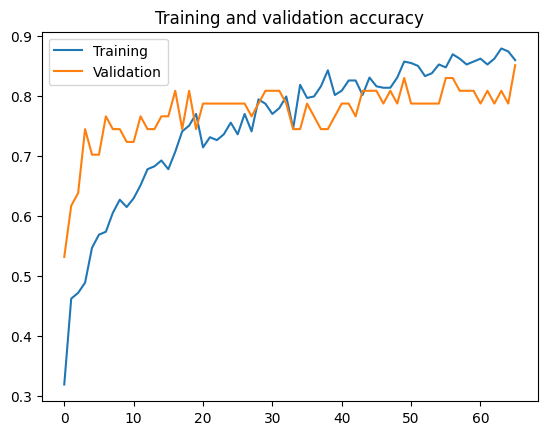

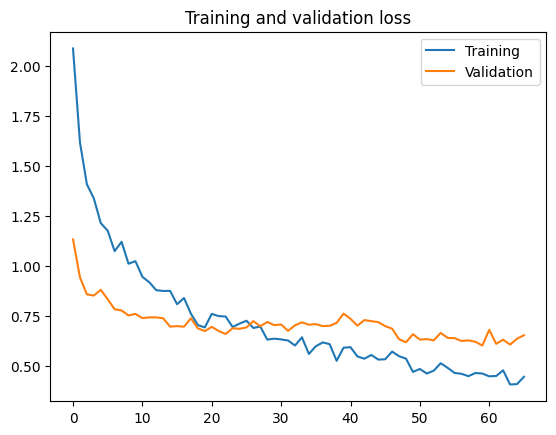

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [ ]:
# save the model
model.save('/content/ML/Models/model_skin_types.h5')

In [ ]:
# save the model in the SavedModel format
export_dir = '/content/ML/Models/saved_model_skin_types'
tf.saved_model.save(model, export_dir)

# Model Prediction

In [ ]:
from google.colab import files
from keras.preprocessing import image
import keras.utils as image

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  
  # Get the class indices from the generator
  class_indices = train_generator.class_indices

  # Invert the dictionary to get the mapping from indices to class names
  index_to_class = {v: k for k, v in class_indices.items()}

  # Print the index and class name for each class
  for index in sorted(index_to_class.keys()):
      class_name = index_to_class[index]
      print("Index:", index, " - Class Name:", class_name)

  predicted_class = model.predict(images, batch_size=10)
  print(predicted_class)

  class_labels = ["Dry", "Normal", "Oily", "Sensitive"]

  predicted_class_index = np.argmax(predicted_class)
  predicted_class_label = class_labels[predicted_class_index]

  print("Predicted class label:", predicted_class_label)
  print(f"Accuracy: {predicted_class[0][predicted_class_index]:.4f}")

Saving 29.jpg to 29.jpg
Index: 0  - Class Name: Dry
Index: 1  - Class Name: Normal
Index: 2  - Class Name: Oily
Index: 3  - Class Name: Sensitive
1/1 [==============================] - 1s 1s/step
[[0.00737905 0.00569426 0.9856623  0.00126438]]
Predicted class label: Oily
Accuracy: 0.9857


In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('/content/ML/Models/skin_types_model.tflite', 'wb') as f:
    f.write(tflite_model)